In [13]:
import networkx as nx
import matplotlib as mpl
import json
import matplotlib.pyplot as plt 
from Modules.NetVisualizer.net_visualizer import *
from Modules.NetBuilder.net_builder import net_build
from Utils.scraper_script import *
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import collections
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math
from Utils import scraper_script

ImportError: cannot import name 'is_directory' from 'PIL._util' (c:\Users\elias\anaconda3\lib\site-packages\PIL\_util.py)

In [44]:
Syn= [10,	18,	25,	37,	58,	62,	106,	133]
Canonical=	[35,	65,	74,	124	,184	,206,	489,	649]
x=[2013,2014,2015,2016,2017,2018,2021,2022]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Syn,
                    mode='lines+markers',
                    name='Synonymized tag'))
fig.add_trace(go.Scatter(x=x, y=Canonical,
                    mode='lines+markers',
                    name='Canonical tag'))


fig.update_layout(width=750, height=400,margin=dict(l=20, r=20, t=20, b=20),font=dict(family='Times New Roman',
                     size=12))
# fig.update_yaxes(title_text="Number of Political Actions",row=1, col=1)
# fig.update_xaxes(title_text="Years ",row=1, col=1)
fig.update_layout(
    # title='Average High and Low Temperatures in New York',
                   xaxis_title="'Disability'-RATAS Years",
                   yaxis_title='Count (Tags)')
# fig.update_layout(legend=dict(y=0.5, traceorder='reversed', title="Tag's Type" ))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,title="Tag Type"
))
fig.show()

In [45]:
x=['2014','2015','2016','2017','2018','2021','2022']
syn=[8, 7, 12, 21, 4,	45,	31]
can=[30, 9, 50, 80, 42, 322, 170]
rem=[2, 0, 0, 20, 20, 40, 14]
labels=["Synonymized","Canonimized","Removed"]

# fig = px.line(x=x, y=[syn,can,rem])
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=syn,
                    mode='lines+markers',
                    name='Synonymized'))
fig.add_trace(go.Scatter(x=x, y=can,
                    mode='lines+markers',
                    name='Canonized'))
fig.add_trace(go.Scatter(x=x, y=rem,
                    mode='lines+markers',
                    name='Removed'))

fig.update_layout(width=750, height=400,margin=dict(l=20, r=20, t=20, b=20),font=dict(family='Times New Roman',
                     size=12))
# fig.update_yaxes(title_text="Number of Political Actions",row=1, col=1)
# fig.update_xaxes(title_text="Years ",row=1, col=1)
fig.update_layout(
    # title='Average High and Low Temperatures in New York',
                   xaxis_title='Years',
                   yaxis_title='Number of Political Actions')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', title="Political Actions" ))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01,title="Tag's Type"
))
fig.show()

# Data Analysis
Uses DaScra output of Disability dataset

## Reading/Cleaning Data

In [23]:
data_to_read='./OutputFiles/disability_ratas_current/dascra_output_disability.xlsx'

stories_df= pd.read_excel(data_to_read,
              dtype={
                  'AdditionalTags': str, 'ArchiveWarning': str,
                  'Author': str, 'Bookmarks': str,
                  'Category': str, 'Chapters': str,
                  'Characters': str, 'Comments': str,
                  'Fandom': str, 'Hits': int,
                  'Kudos': object, 'Language': str,
                  'Rating': str, 'Relationship': str,
                  'Series': str, 'Part': float,
                  'SourceURL': str, 'Title': str,
                  'Updated': str, 'Words': str,
              }) 


stories_df=stories_df.drop_duplicates()
# stories_df=stories_df.loc[stories_df.Language=='English']
# stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL','ArchiveWarning','Bookmarks','Category','Characters','Language','Rating','Relationship','Updated','Words'])
stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL','ArchiveWarning','Bookmarks','Category','Characters','Language','Rating','Relationship','Words'])
# stories_df=stories_df[['Title', 'AdditionalTags']]



stories_df['Title']=stories_df['Title'].apply(lambda x: x.strip())

stories_df['AdditionalTags']=stories_df['AdditionalTags'].apply(lambda x: [item.strip().replace("/",'*s*').replace(".",'*d*').replace('?','*q*')  for item in str(x).split(',')])
# stories_df['AdditionalTags']=stories_df['AdditionalTags'].apply(lambda x: [item.replace("/",'*s*').replace(".",'*d*').replace('?','*q*') for item in str(x).split(',')])
all_additionaltags=[]
stories_df["AdditionalTags"].apply(lambda x: all_additionaltags.extend(x))
len(all_additionaltags)


stories_df['StoryTagCount']=stories_df["AdditionalTags"].apply(lambda x: len(x))

## Visualizations


### Story's tags count Histogram


In [124]:
Q1 = stories_df.StoryTagCount.quantile(0.25)
Q3 = stories_df.StoryTagCount.quantile(0.75)
IQR = Q3 - Q1
# Freedman Diaconis Estimator for number of bins
temp = (stories_df.StoryTagCount.max() - stories_df.StoryTagCount.min())
bin_width= 2*IQR*temp**(-1/3)
nbins = math.ceil(temp / bin_width)

fig = px.histogram(stories_df, x="StoryTagCount", nbins=nbins,marginal="box")
fig.update_layout(bargap=0.2)
fig.update_layout(width=750, height=400,margin=dict(l=10, r=20, t=20, b=20))
fig.update_yaxes(title_text="Amount of Stories",row=1, col=1)
fig.update_xaxes(title_text="Amount of Tags",row=1, col=1)

fig.show()

In [127]:
a= collections.Counter(all_additionaltags)
print(len(a))
[a.pop(key) for key in a.copy() if a[key]<=1000]
print(len(a))

177777
47


### Individual Tags Count


In [81]:
fig = px.bar(x=list(a.keys()), y=list(a.values()))
# fig.
fig.update_layout(xaxis={'categoryorder':'total descending'}) 
# fig.update_layout(width=750, height=400,margin=dict(l=10, r=20, t=20, b=20))
# fig.update_yaxes(title_text="Amount of Stories",row=1, col=1)
# fig.update_xaxes(title_text="Amount of Tags",row=1, col=1)
fig.show()

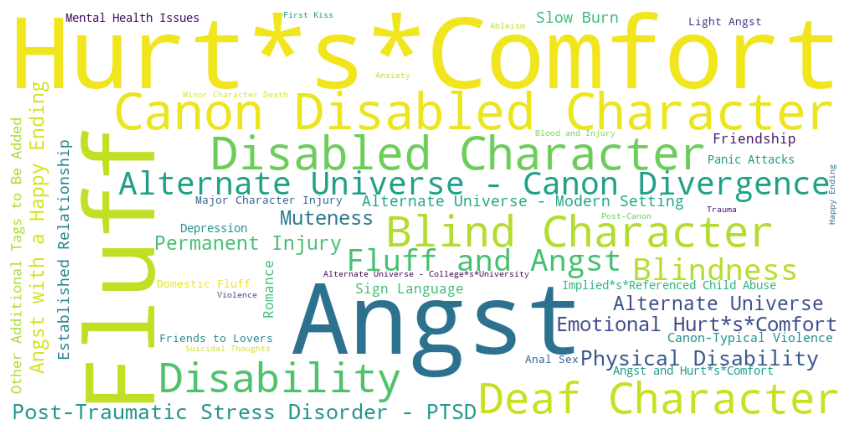

In [22]:
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(a)

plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)

# Disability RATAS

## reading current Disability and updaing df

In [24]:
disability_ratas = read_JSON('./OutputFiles/disability_ratas_current/rata_disability_current_expanded_full.json')
disability_ratas = net_build(disability_ratas)
# disability_ratas =  nx.DiGraph(disability_ratas[0])

In [25]:
stories_df["DisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item)])
stories_df["DisabilityTagsCount"]=stories_df.DisabilityTags.apply(len)
 
stories_df["NonDisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if not disability_ratas.has_node(item)])
stories_df["NonDisabilityTagsCount"]=stories_df.NonDisabilityTags.apply(len)


stories_df["DisabilityCanocicalTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='canonical_tag'])
stories_df["DisabilityCanonicalTagsCount"]=stories_df.DisabilityCanocicalTags.apply(len)
stories_df["DisabilitySynTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='synned_tag'])
stories_df["DisabilitySynTagsCount"]=stories_df.DisabilitySynTags.apply(len)
stories_df["DisabilityFreeFormTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='freeform_tag'])
stories_df["DisabilityFreeFormTagsCount"]=stories_df.DisabilityFreeFormTags.apply(len)
# stories_df.head()


In [11]:

stories_df["StoryTagCount"].sum()

688469

In [19]:
stories_df.shape

(45444, 19)

In [15]:
stories_df["DisabilityCanonicalTagsCount"].sum()/stories_df["DisabilityTagsCount"].sum()


0.8231718610563891

In [17]:
stories_df["DisabilitySynTagsCount"].sum()/stories_df["DisabilityTagsCount"].sum()

0.17005943661497533

In [18]:
stories_df["DisabilityFreeFormTagsCount"].sum()/stories_df["DisabilityTagsCount"].sum()

0.006768702328635652

In [130]:
stories_df.loc[stories_df.DisabilityTagsCount==0,"Title"][50]
# stories_df.loc[stories_df.DisabilityTagsCount==0,["AdditionalTags"]]

'And If My Lover Will Not Hear It'

 scraper_script.tagscra_list(["Deaf!Dean"],of='disability_rata_current')
 
 "Deaf!Dean" does not appears in the synned group

 disability_ratas.nodes['Deaf Levi Ackerman']
 
 disability_ratas.nodes["Deaf!Dean"]

In [26]:
tags_stories_no_disability=[]
stories_df.loc[stories_df.DisabilityTagsCount==0,"AdditionalTags"].apply(lambda x: tags_stories_no_disability.extend(x))
len(set(tags_stories_no_disability))

75

In [27]:
stories_df.loc[stories_df.DisabilityTagsCount==0,['Title',"Author","AdditionalTags","Updated"]]
# a

Title            Author  \
50        And If My Lover Will Not Hear It  elledritchhorror   
1446                         【法加】发生在情人节的野外    POLARMELONGUAT   
10434  Won't you look me right in the eyes  bannabread_innie   
18557                              Finally      fandomgeek14   
19049                  After the Aftermath      fandomgeek14   
19384                      A Guiding Voice      fandomgeek14   

                                          AdditionalTags      Updated  
50     [this is basically "what if the ritual in scot...  27 Apr 2022  
1446           [野外, 主要角色残疾描写有, 成瘾, WW2背景, 人类 - Freeform]  04 Apr 2022  
10434  [Implied*s*Referenced Car Accident, Sad, Deaf ...  01 Jul 2021  
18557  [First Kiss, Getting Together, selective mute ...  25 Aug 2020  
19049  [5am, sam and five are in love, but they’re to...  04 Aug 2020  
19384  [Pre-Relationship, Five has a crush on Sam but...  21 Jul 2020

In [28]:
disability_ratas.nodes['Deaf Kim Seungmin']
disability_ratas.nodes['Selectively Mute Runner Five'] 

{'type': 'canonical_tag',
 'title': 'Selectively Mute Runner Five<br> Subtags: 0<br> Metatags: 1',
 'color': '#CA6F1E',
 'group': 2}

1. First Story: "except the mutism that's the entire fic" is been syned to "Muteness" but still does not appear in the syn group
2. Third one: Deaf Seungmin to Deaf Kim Seungmin but was not captured in the RATAS when mining it
3. 3rd, 4th, and 5th one: "Selectively Mute Runner Five" syned group was not captured in the RATAS when mining it --> "selective mute Runner 5"

## Disability RATAS TAgs

In [123]:
fig = px.histogram(stories_df.DisabilityTagsCount,x='DisabilityTagsCount',log_y=True,marginal="box")
fig.update_layout(bargap=0.2)
fig.update_layout(width=750, height=400,margin=dict(l=10, r=20, t=20, b=20))
fig.update_yaxes(title_text="Amount of Stories",row=1, col=1)
fig.update_xaxes(title_text="Amount of Disability-Tags",row=1, col=1)
fig.show()

In [121]:
fig = px.histogram(stories_df, x=['DisabilityTagsCount',"StoryTagCount"],log_y=True,marginal="box")
fig.update_layout(bargap=0.02)
fig.update_layout(width=750, height=400,margin=dict(l=10, r=20, t=20, b=20))
fig.update_yaxes(title_text="Amount of Stories",row=1, col=1)
fig.update_xaxes(title_text="Amount of Tags",row=1, col=1)

fig.show()

In [28]:
print(len(all_additionaltags))
add_tags= list(set(all_additionaltags))
disability_tags=[tag for tag in add_tags if disability_ratas.has_node(tag)]
len(disability_tags)

688469


3305

In [80]:

# sns.set(rc = {'figure.figsize':(0,0)})
# fig = px.pie(values=[len(disability_tags),(len(add_tags)-len(disability_tags))], names=['Disability Tags', 'Non Disability Tags'],title="Disability Tags vs Non Disability Tags Usage")
fig = px.pie(values=[len(disability_tags),(len(add_tags)-len(disability_tags))], names=['Disability Tags', 'Non Disability Tags'])
fig.update_layout(width=600, height=500,margin=dict(l=20, r=20, t=50, b=20))
fig.show()

## All versions



In [29]:
# net_visualize(disability_ratas)
G= disability_ratas.copy()

for item in G.nodes:
    G.nodes[item]['color']='#2E86C1' if item in disability_tags else  '#F39C12'

net_visualize(G)

<class 'pyvis.network.Network'> |N|=5060 |E|=5,078

###  getting all the verions of the Disability Ratas

In [85]:
years=['2013','2014','2015','2016','2017','2018','2021']
ratas_versions=[]

for item in years:
    temp = read_JSON('./OutputFiles/disability/rata_disability_'+item+'.json')
    ratas_versions.append(net_build(temp))


In [86]:
for dis_rata,v in zip(ratas_versions,years):
    stories_df["DisabilityTags"+'_'+v]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if dis_rata.has_node(item)])
    stories_df["DisabilityTagsCount"+'_'+v]=stories_df["DisabilityTags"+'_'+v].apply(len)
    
    stories_df["NonDisabilityTags"+'_'+v]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if not dis_rata.has_node(item)])
    stories_df["NonDisabilityTagsCount"+'_'+v]=stories_df["NonDisabilityTags"+'_'+v].apply(len)
    
    
    stories_df["DisabilityCanocicalTags"+'_'+v]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if dis_rata.has_node(item) and dis_rata.nodes[item]['type']=='canonical_tag'])
    stories_df["DisabilityCanonicalTagsCount"+'_'+v]=stories_df["DisabilityCanocicalTags"+'_'+v].apply(len)
    stories_df["DisabilitySynTags"+'_'+v]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if dis_rata.has_node(item) and dis_rata.nodes[item]['type']=='synned_tag'])
    stories_df["DisabilitySynTagsCount"+'_'+v]=stories_df["DisabilitySynTags"+'_'+v].apply(len)
    stories_df["DisabilityFreeFormTags"+'_'+v]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if dis_rata.has_node(item) and dis_rata.nodes[item]['type']=='freeform_tag'])
    stories_df["DisabilityFreeFormTagsCount"+'_'+v]=stories_df["DisabilityFreeFormTags"+'_'+v].apply(len)

### Plot Usage over time of Disability Tags

In [88]:
disability_tag_usage=[stories_df["DisabilityTagsCount"+'_'+v].sum() for v in years]
disability_tag_usage.append(stories_df["DisabilityTagsCount"].sum())

In [94]:
fig = px.line(x=['2013','2014','2015','2016','2017','2018','2021','2022'], y=disability_tag_usage)

fig.update_layout(width=750, height=400,margin=dict(l=20, r=20, t=20, b=20))
fig.update_yaxes(title_text="Usage of Disability-Tags",row=1, col=1)
fig.update_xaxes(title_text="Version of Disability-ATAS ",row=1, col=1)

fig.show()

In [95]:
tag_usage_rate=[stories_df["DisabilityTagsCount"+'_'+v].sum()/stories_df["StoryTagCount"].sum() for v in years]
tag_usage_rate.append(stories_df["DisabilityTagsCount"].sum()/stories_df["StoryTagCount"].sum())

In [21]:
# fig = px.line(x=['2013','2014','2015','2016','2017','2018','2021','2022'], y=tag_usage_rate,title="Disability Tags Rate Usage")
# fig.show()

### Analysis 

In [133]:
G= disability_ratas.copy()
non_used=[]
for item in G.nodes:
    G.nodes[item]['usage']=True if item in disability_tags else  False
    non_used.append(item) if not G.nodes[item]['usage'] else None
print(len(non_used))
non_used_leafs=[tag for tag in non_used if G.out_degree(tag)==0 and G.nodes[tag]['type']=='canonical_tag']
non_used=[tag for tag in non_used if G.nodes[tag]['type']=='canonical_tag']
len(non_used_leafs)

1755


3

In [134]:
len(non_used)

107

In [97]:
print(G.out_degree(non_used_leafs[0]))
print(G.in_degree(non_used_leafs[0]))
G.nodes[non_used_leafs[0]]

0
1


{'type': 'canonical_tag',
 'title': '<h3>Mute Michael Clifford<h3><br> Subtags: 0<br> Metatags: 1',
 'color': '#2E86C1',
 'group': 0,
 'synned_tags': [],
 'usage': False}

In [98]:
# stories_df.loc[stories_df.Title=='Seeing Eye Wolf']
stories_df.loc[stories_df.Title=='']
stories_df[stories_df['AdditionalTags'].isin(['Blind James T*d* Kirk'])]

Empty DataFrame
Columns: [Title, AdditionalTags, Author, Chapters, Fandom, Series, Part, StoryTagCount, DisabilityTags, DisabilityTagsCount, NonDisabilityTags, NonDisabilityTagsCount, DisabilityCanocicalTags, DisabilityCanonicalTagsCount, DisabilitySynTags, DisabilitySynTagsCount, DisabilityFreeFormTags, DisabilityFreeFormTagsCount, DisabilityTags_2013, DisabilityTagsCount_2013, NonDisabilityTags_2013, NonDisabilityTagsCount_2013, DisabilityCanocicalTags_2013, DisabilityCanonicalTagsCount_2013, DisabilitySynTags_2013, DisabilitySynTagsCount_2013, DisabilityFreeFormTags_2013, DisabilityFreeFormTagsCount_2013, DisabilityTags_2014, DisabilityTagsCount_2014, NonDisabilityTags_2014, NonDisabilityTagsCount_2014, DisabilityCanocicalTags_2014, DisabilityCanonicalTagsCount_2014, DisabilitySynTags_2014, DisabilitySynTagsCount_2014, DisabilityFreeFormTags_2014, DisabilityFreeFormTagsCount_2014, DisabilityTags_2015, DisabilityTagsCount_2015, NonDisabilityTags_2015, NonDisabilityTagsCount_2015, DisabilityCanocicalTags_2015, DisabilityCanonicalTagsCount_2015, DisabilitySynTags_2015, DisabilitySynTagsCount_2015, DisabilityFreeFormTags_2015, DisabilityFreeFormTagsCount_2015, DisabilityTags_2016, DisabilityTagsCount_2016, NonDisabilityTags_2016, NonDisabilityTagsCount_2016, DisabilityCanocicalTags_2016, DisabilityCanonicalTagsCount_2016, DisabilitySynTags_2016, DisabilitySynTagsCount_2016, DisabilityFreeFormTags_2016, DisabilityFreeFormTagsCount_2016, DisabilityTags_2017, DisabilityTagsCount_2017, NonDisabilityTags_2017, NonDisabilityTagsCount_2017, DisabilityCanocicalTags_2017, DisabilityCanonicalTagsCount_2017, DisabilitySynTags_2017, DisabilitySynTagsCount_2017, DisabilityFreeFormTags_2017, DisabilityFreeFormTagsCount_2017, DisabilityTags_2018, DisabilityTagsCount_2018, NonDisabilityTags_2018, NonDisabilityTagsCount_2018, DisabilityCanocicalTags_2018, DisabilityCanonicalTagsCount_2018, DisabilitySynTags_2018, DisabilitySynTagsCount_2018, DisabilityFreeFormTags_2018, DisabilityFreeFormTagsCount_2018, DisabilityTags_2021, DisabilityTagsCount_2021, NonDisabilityTags_2021, NonDisabilityTagsCount_2021, DisabilityCanocicalTags_2021, DisabilityCanonicalTagsCount_2021, DisabilitySynTags_2021, DisabilitySynTagsCount_2021, DisabilityFreeFormTags_2021, DisabilityFreeFormTagsCount_2021]
Index: []

[0 rows x 88 columns]

- Mute Michael Clifford currently has no work attached to it, which can means after the tag was canonized under Mute Michael it was updated or deleted teh story
- Blind Albedo (Genshin Impact) and Deaf Kim Seunmin now have synned tags but they do not appear in any story !!!

In [99]:
G.in_edges('Blind Albedo (Genshin Impact)')

InEdgeDataView([('Blind Character', 'Blind Albedo (Genshin Impact)')])

In [100]:
with open('./OutputFiles/disability_ratas_current/rata_disability_current.json', 'r', encoding='utf-8') as f:
    current_data = json.load(f)
    current_data=net_build(current_data)
f.close()
with open('./OutputFiles/disability_ratas_current/rata_disability_current_expanded.json', 'r', encoding='utf-8') as f:
    expanded = json.load(f)
f.close()
for k in current_data.nodes:
    # print(k) if 
    if not k in expanded.keys() and current_data.nodes[k]['type']=='canonical_tag':
        print(k)
# 'Mute Trafalgar D*d* Water Law' in expanded.keys()
# expanded['Blind Albedo (Genshin Impact)']